Вопросы и гипотезы:
1) Из какой страны было взято наибольшее число игроков?
2) Какое значение параметра "Points per Game Played" у игроков входящих в 5% лучших? (считаем, что игроки с большим P/GP лучше, чем с меньшим)
3) Правда ли, что средний рост игроков пропорционален среднему росту в Канаде (в зависимости от даты рождения)?
4) В каком возрасте играют первый сезон?
5) Как изменились средние показатели после 60-ого года?

In [287]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Подготовка датасета с данными за все сезоны

## Для начала объединим таблицы Bio info (0-78) и Summury (0-78), а также удалим одинаковые строки. В итоге должно остаться 7735 строк

In [288]:
def get_bio_info_table():
    list_of_bio_info = []
    for i in range(79):
        list_of_bio_info.append(pd.read_excel("nhl/bio/Bio info (" + str(i) + ").xlsx"))
    bio_info = pd.concat(list_of_bio_info, axis=0)
    bio_info = bio_info.drop_duplicates()
    return bio_info
bio_info = get_bio_info_table()
bio_info

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,Draft Yr,Round,Overall,1st Season,HOF,GP,G,A,P
0,Jack Laviolette,R,D,1879-07-27,Belleville,ON,CAN,CAN,71,170,--,--,--,19171918,Y,18,2,1,3
1,Ken Thompson,L,L,1881-05-29,Oakengates,--,GBR,GBR,70,160,--,--,--,19171918,N,1,0,0,0
2,Joe Hall,R,D,1882-05-03,Staffordshire,--,GBR,GBR,70,175,--,--,--,19171918,Y,37,15,9,24
3,Didier Pitre,R,R,1883-09-01,Valleyfield,QC,CAN,CAN,71,185,--,--,--,19171918,Y,127,64,35,99
4,Lester Patrick,L,D,1883-12-30,Drummondville,QC,CAN,CAN,73,180,--,--,--,19261927,Y,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Bradly Nadeau,R,L,2005-05-05,St-Francois de Madaw,NB,CAN,CAN,71,172,2023,1,30,20232024,N,1,0,0,0
31,Zach Benson,L,L,2005-05-12,Chilliwack,BC,CAN,CAN,70,170,2023,1,13,20232024,N,112,19,27,46
32,Connor Bedard,R,C,2005-07-17,North Vancouver,BC,CAN,CAN,70,185,2023,1,1,20232024,N,115,35,67,102
33,Macklin Celebrini,L,C,2006-06-13,North Vancouver,BC,CAN,CAN,72,190,2024,1,1,20242025,N,38,14,20,34


In [289]:
def get_summary_table():
    list_of_summary = []
    for i in range(79):
        list_of_summary.append(pd.read_excel("nhl/summary/Summary (" + str(i) + ").xlsx"))
    summary = pd.concat(list_of_summary, axis=0)
    summary = summary.drop_duplicates()
    return summary
summary = get_summary_table()
summary

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Antti Aalto,L,C,151,11,17,28,-25,52,0.19,...,3,4,0,0,0,1,182,6,11:03,49.7
1,Reg Abbott,L,C,3,0,0,0,0,0,0.00,...,0,0,0,0,0,0,--,--,--,--
2,Spencer Abbott,R,L,2,0,0,0,-2,0,0.00,...,0,0,0,0,0,0,3,0,6:55,--
3,Justin Abdelkader,L,L,739,106,146,252,-56,608,0.34,...,25,48,1,3,3,15,"1,238",8.6,14:54,50.5
4,Clarence Abel,L,D,333,20,18,38,0,365,0.11,...,0,0,1,1,1,5,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Jason Zucker,L,L,743,212,193,405,-3,386,0.55,...,43,88,3,5,3,32,"1,683",12.6,15:30,32
31,Mike Zuke,R,C,455,86,196,282,-42,220,0.62,...,21,105,3,7,0,6,754,11.4,--,--
32,Rudy Zunich,L,D,2,0,0,0,0,2,0.00,...,0,0,0,0,0,0,--,--,--,--
33,Valentin Zykov,R,L,55,7,10,17,-2,10,0.31,...,1,3,0,0,0,1,69,10.1,11:07,18.2


In [290]:
print(bio_info.columns)
print(summary.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P'],
      dtype='object')
Index(['Player', 'S/C', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'P/GP',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%',
       'TOI/GP', 'FOW%'],
      dtype='object')


Теперь объединим таблицы в одну

In [291]:
player_info = pd.merge(left=bio_info, right=summary, left_on=['Player', 'S/C', 'Pos', 'GP', 'A', 'P', 'G'], right_on=['Player', 'S/C', 'Pos', 'GP', 'A', 'P', 'G'])
player_info

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Jack Laviolette,R,D,1879-07-27,Belleville,ON,CAN,CAN,71,170,...,--,--,--,--,0,0,--,--,--,--
1,Ken Thompson,L,L,1881-05-29,Oakengates,--,GBR,GBR,70,160,...,--,--,--,--,0,0,--,--,--,--
2,Joe Hall,R,D,1882-05-03,Staffordshire,--,GBR,GBR,70,175,...,--,--,--,--,0,1,--,--,--,--
3,Didier Pitre,R,R,1883-09-01,Valleyfield,QC,CAN,CAN,71,185,...,--,--,--,--,0,12,--,--,--,--
4,Lester Patrick,L,D,1883-12-30,Drummondville,QC,CAN,CAN,73,180,...,--,--,--,--,0,0,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,Bradly Nadeau,R,L,2005-05-05,St-Francois de Madaw,NB,CAN,CAN,71,172,...,0,0,0,0,0,0,3,0,19:08,--
7731,Zach Benson,L,L,2005-05-12,Chilliwack,BC,CAN,CAN,70,170,...,1,4,0,0,0,1,159,12,14:41,21.2
7732,Connor Bedard,R,C,2005-07-17,North Vancouver,BC,CAN,CAN,70,185,...,9,39,0,0,1,5,318,11,19:50,36.2
7733,Macklin Celebrini,L,C,2006-06-13,North Vancouver,BC,CAN,CAN,72,190,...,4,10,0,0,1,3,125,11.2,19:35,48.7


In [292]:
print(player_info.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P', '+/-', 'PIM', 'P/GP', 'EVG', 'EVP', 'PPG', 'PPP', 'SHG',
       'SHP', 'OTG', 'GWG', 'S', 'S%', 'TOI/GP', 'FOW%'],
      dtype='object')


In [293]:
player_info['A'][player_info['A'].apply(lambda x: not str(x).isdigit())]

938     1,049
1832    1,040
2710    1,169
2717    1,193
2721    1,963
2771    1,135
2886    1,079
2933    1,249
3192    1,063
3239    1,033
3716    1,016
4008    1,155
4886    1,109
5854    1,042
Name: A, dtype: object

In [294]:
player_info['P'][player_info['P'].apply(lambda x: not str(x).isdigit())]

938     1,850
1045    1,219
1051    1,281
1159    1,369
1179    1,229
        ...  
5901    1,096
5999    1,314
6131    1,168
6222    1,082
7056    1,047
Name: P, Length: 99, dtype: object

In [295]:
player_info['G'][player_info['G'].apply(lambda x: not str(x).isdigit())]

Series([], Name: G, dtype: int64)

In [296]:
player_info['GP'][player_info['GP'].apply(lambda x: not str(x).isdigit())]

833     1,113
851     1,068
876     1,244
912     1,316
916     1,248
        ...  
6273    1,116
6293    1,015
6327    1,029
6376    1,009
6448    1,048
Name: GP, Length: 401, dtype: object

In [297]:
print(sorted(player_info['Ht'])[:5])
print(sorted(player_info['Ht'])[-5:])

[0, 0, 0, 0, 0]
[80, 80, 80, 81, 81]


In [298]:
def convert_to_int(x):
    if str(x).isdigit():
        return int(x)
    else:
        return int(str(x)[0] + str(x)[2:])
player_info['A'] = player_info['A'].apply(convert_to_int)
player_info['P'] = player_info['P'].apply(convert_to_int)
player_info['GP'] = player_info['GP'].apply(convert_to_int)
player_info['Ht'] = player_info['Ht'].apply(lambda x: x * 2.54)
player_info['DOB'] = pd.to_datetime(player_info['DOB'], format='%Y-%m-%d')
player_info['1st Season'] = pd.to_datetime(player_info['1st Season'].apply(lambda x: str(x)[:4]), format='%Y')

In [299]:
player_info = player_info.drop(columns=['+/-', 'EVG', 'PPP', 'S%', 'EVP', 'TOI/GP', 'PPG', 'FOW%'])

## Инфо

In [300]:
print(player_info.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P', 'PIM', 'P/GP', 'SHG', 'SHP', 'OTG', 'GWG', 'S'],
      dtype='object')


In [301]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player      7735 non-null   object        
 1   S/C         7735 non-null   object        
 2   Pos         7735 non-null   object        
 3   DOB         7735 non-null   datetime64[ns]
 4   Birth City  7735 non-null   object        
 5   S/P         7735 non-null   object        
 6   Ctry        7735 non-null   object        
 7   Ntnlty      7735 non-null   object        
 8   Ht          7735 non-null   float64       
 9   Wt          7735 non-null   object        
 10  Draft Yr    7735 non-null   object        
 11  Round       7735 non-null   object        
 12  Overall     7735 non-null   object        
 13  1st Season  7735 non-null   datetime64[ns]
 14  HOF         7735 non-null   object        
 15  GP          7735 non-null   int64         
 16  G           7735 non-nul

In [302]:
player_info.describe()

,DOB,Ht,1st Season,GP,G,A,P,P/GP,OTG,GWG
count,7735,7735.000000,7735,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,1966-01-09 07:01:28.894634784,183.304264,1987-08-26 02:01:34.014221056,281.689981,49.775048,81.076147,130.851196,0.299824,0.638526,7.135488
min,1879-07-27 00:00:00,0.000000,1917-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1952-09-25 12:00:00,180.340000,1974-01-01 00:00:00,20.000000,1.000000,2.000000,3.000000,0.130000,0.000000,0.000000
50%,1970-11-03 00:00:00,182.880000,1993-01-01 00:00:00,125.000000,10.000000,18.000000,30.000000,0.250000,0.000000,1.000000
75%,1987-03-04 12:00:00,187.960000,2009-01-01 00:00:00,471.000000,54.000000,99.000000,158.500000,0.430000,0.000000,7.000000
max,2006-08-21 00:00:00,205.740000,2024-01-01 00:00:00,1779.000000,894.000000,1963.000000,2857.000000,1.920000,27.000000,135.000000
std,NaN,8.852042,NaN,337.615176,91.535094,139.825530,225.952308,0.239963,1.851806,13.739420


In [303]:
player_info.sample(10)

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,...,G,A,P,PIM,P/GP,SHG,SHP,OTG,GWG,S
2593,Chris Langevin,L,L,1959-11-27,Montréal,QC,CAN,CAN,182.88,190,...,3,1,4,22,0.18,0,0,0,0,14
6898,Tony DeAngelo,R,D,1995-10-24,Sewell,NJ,USA,USA,180.34,180,...,48,162,210,329,0.57,0,0,3,7,770
5661,Mike Card,R,D,1986-02-18,Kitchener,ON,CAN,CAN,185.42,201,...,0,0,0,0,0.00,0,0,0,0,0
3507,Martin Hostak,L,C,1967-11-11,Praha,--,CZE,CZE,190.50,198,...,3,11,14,24,0.25,0,0,0,0,72
5235,Igor Radulov,L,L,1982-08-23,Nizhny Novgorod,--,RUS,RUS,185.42,186,...,9,7,16,22,0.37,0,0,0,0,61
3267,Randy Burridge,L,L,1966-01-07,Fort Erie,ON,CAN,CAN,175.26,188,...,199,251,450,458,0.64,9,18,2,29,"1,310"
1060,Donnie Marshall,L,L,1932-03-23,Montréal,QC,CAN,CAN,177.80,160,...,265,324,589,125,0.50,18,36,0,40,"1,660"
2221,Blair MacKasey,R,D,1955-12-13,Hamilton,ON,CAN,CAN,187.96,200,...,0,0,0,2,0.00,0,0,0,0,0
3146,Tim Bergland,R,R,1965-01-11,Crookston,MN,USA,USA,190.50,194,...,17,26,43,75,0.24,0,2,0,0,188
1220,George Konik,L,D,1937-05-04,Flin Flon,MB,CAN,CAN,180.34,190,...,7,8,15,26,0.29,0,0,0,1,50


# Подготовка датасета с данными за сезоны c 1917ого года по 1959ый

In [304]:
def get_table17():
    list_of_summary = []
    for i in range(13):
        list_of_summary.append(pd.read_excel("nhl 17-59/Summary (" + str(i) + ").xlsx"))
    summary = pd.concat(list_of_summary, axis=0)
    summary = summary.drop_duplicates()
    return summary
player_info17 = get_table17()
player_info17

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Gordie Howe,R,R,916,446,531,977,16,942,1.07,...,103,288,10,15,0,77,354,--,--,--
1,Maurice Richard,L,R,978,544,422,966,18,1 287,0.99,...,143,254,4,6,0,83,166,--,--,--
2,Ted Lindsay,L,L,999,365,458,823,-1,1 635,0.82,...,92,213,9,10,0,57,104,--,--,--
3,Elmer Lach,L,C,664,215,408,623,0,478,0.94,...,60,164,2,4,0,45,--,--,--,--
4,Milt Schmidt,L,C,776,229,346,575,0,466,0.74,...,31,98,4,7,4,35,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Ken Yackel,R,R,6,0,0,0,0,2,0.00,...,0,0,0,0,0,0,--,--,--,--
14,Marty Zoborosky,R,D,1,0,0,0,0,2,0.00,...,0,0,0,0,0,0,--,--,--,--
15,Ed Zeniuk,L,D,2,0,0,0,0,0,0.00,...,0,0,0,0,0,0,--,--,--,--
16,Rudy Zunich,L,D,2,0,0,0,0,2,0.00,...,0,0,0,0,0,0,--,--,--,--


In [305]:
player_info17.columns

Index(['Player', 'S/C', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'P/GP',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%',
       'TOI/GP', 'FOW%'],
      dtype='object')

In [306]:
player_info17 = player_info17.drop(columns=['Player', 'S/C', 'Pos', '+/-', 'PIM',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%', 'TOI/GP', 'FOW%'])

In [307]:
player_info17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 0 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      1218 non-null   int64  
 1   G       1218 non-null   int64  
 2   A       1218 non-null   int64  
 3   P       1218 non-null   int64  
 4   P/GP    1218 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


In [308]:
player_info17.describe()

,GP,G,A,P,P/GP
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,158.061576,31.555008,39.720033,71.275041,0.294401
std,197.138124,55.664646,67.650544,120.047919,0.254805
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,1.000000,0.090000
50%,63.500000,6.000000,8.000000,15.000000,0.250000
75%,247.000000,32.750000,47.000000,86.000000,0.450000
max,999.000000,544.000000,531.000000,977.000000,1.690000


# Подготовка датасета с данными за сезоны c 1960ого года по 2024ый

In [309]:
def get_table60():
    list_of_summary = []
    for i in range(67):
        list_of_summary.append(pd.read_excel("nhl 60-24/Summary (" + str(i) + ").xlsx"))
    summary = pd.concat(list_of_summary, axis=0)
    summary = summary.drop_duplicates()
    return summary
player_info60 = get_table60()
player_info60

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Wayne Gretzky,L,C,1 487,894,1 963,2 857,520,577,1.92,...,204,890,73,149,2,91,5 088,17.6,--,49
1,Jaromir Jagr,L,R,1 733,766,1 155,1 921,322,1 167,1.11,...,217,610,11,15,19,135,5 637,13.6,--,24.5
2,Mark Messier,L,C,1 756,694,1 193,1 887,211,1 912,1.07,...,179,581,63,144,8,92,4 221,16.4,--,54.7
3,Ron Francis,L,C,1 731,549,1 249,1 798,-18,977,1.04,...,188,727,12,31,4,79,3 756,14.6,--,54.8
4,Marcel Dionne,R,C,1 348,731,1 040,1 771,27,600,1.31,...,234,643,19,30,2,73,5 363,13.6,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Jett Luchanko,R,C,4,0,0,0,-3,2,0.00,...,0,0,0,0,0,0,3,0,14:03,46
65,Artyom Levshunov,R,D,2,0,0,0,-3,0,0.00,...,0,0,0,0,0,0,4,0,20:32,--
66,Jacob Quillan,L,C,1,0,0,0,0,0,0.00,...,0,0,0,0,0,0,0,--,5:21,--
67,Jere Innala,L,L,15,0,0,0,-3,2,0.00,...,0,0,0,0,0,0,4,0,6:55,33.3


In [310]:
player_info60.columns

Index(['Player', 'S/C', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'P/GP',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%',
       'TOI/GP', 'FOW%'],
      dtype='object')

In [311]:
player_info60['A'][player_info60['A'].apply(lambda x: not str(x).isdigit())]

0     1 963
1     1 155
2     1 193
3     1 249
4     1 040
5     1 063
6     1 033
7     1 053
8     1 016
11    1 169
12    1 109
14    1 135
18    1 079
Name: A, dtype: object

In [312]:
player_info60 = player_info60.drop(columns=['Player', 'S/C', 'Pos', '+/-', 'PIM',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%', 'TOI/GP', 'FOW%'])

In [313]:
player_info60['A'] = player_info60['A'].apply(convert_to_int)
player_info60['P'] = player_info60['P'].apply(convert_to_int)
player_info60['GP'] = player_info60['GP'].apply(convert_to_int)

In [314]:
player_info60.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 0 to 68
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      6669 non-null   int64  
 1   G       6669 non-null   int64  
 2   A       6669 non-null   int64  
 3   P       6669 non-null   int64  
 4   P/GP    6669 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


In [315]:
player_info60.describe()

,GP,G,A,P,P/GP
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000
mean,299.424801,52.229420,87.223122,139.452542,0.301898
std,346.198628,94.461117,145.422934,234.311191,0.237654
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,4.000000,0.140000
50%,141.000000,11.000000,22.000000,34.000000,0.250000
75%,513.000000,57.000000,111.000000,172.000000,0.430000
max,1779.000000,894.000000,1963.000000,2857.000000,1.920000


# Подготовка датасета со средним ростом людей по годам рождения

In [316]:
average_heights= pd.read_csv("average-height-by-year-of-birth.csv")
average_heights = average_heights.rename(columns={'Mean male height (cm)': 'M', 'Mean female height (cm)': 'F'})
average_heights

,Entity,Code,Year,M,F
0,Afghanistan,AFG,1896,161.164095,149.187747
1,Afghanistan,AFG,1897,161.196286,149.321451
2,Afghanistan,AFG,1898,161.228297,149.455494
3,Afghanistan,AFG,1899,161.260727,149.589503
4,Afghanistan,AFG,1900,161.293068,149.723587
...,...,...,...,...,...
21003,Zimbabwe,ZWE,1992,169.340762,158.583941
21004,Zimbabwe,ZWE,1993,169.152276,158.492266
21005,Zimbabwe,ZWE,1994,168.963595,158.400025
21006,Zimbabwe,ZWE,1995,168.774934,158.307779


In [317]:
average_heights['Year'] = pd.to_datetime(average_heights['Year'], format='%Y')

In [318]:
average_heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21008 entries, 0 to 21007
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Entity  21008 non-null  object        
 1   Code    20301 non-null  object        
 2   Year    21008 non-null  datetime64[ns]
 3   M       21008 non-null  float64       
 4   F       21008 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 820.8+ KB


In [319]:
average_heights.describe()

,Year,M,F
count,21008,21008.000000,21008.000000
mean,1945-12-31 22:05:56.435643648,168.326718,157.025082
min,1896-01-01 00:00:00,152.884624,140.290050
25%,1921-01-01 00:00:00,164.573544,153.817288
50%,1946-01-01 00:00:00,168.314950,157.294195
75%,1971-01-01 00:00:00,171.634683,160.094419
max,1996-01-01 00:00:00,182.567309,169.797931
std,NaN,5.225347,4.773794


In [320]:
average_heights.sample(10)

,Entity,Code,Year,M,F
18091,Sweden,SWE,1908-01-01,173.182300,161.249526
17573,South Korea,KOR,1996-01-01,174.919625,162.335285
3870,Colombia,COL,1928-01-01,162.851954,150.224361
14949,Philippines,PHL,1897-01-01,154.856682,147.967242
19199,Tunisia,TUN,1905-01-01,164.955696,151.948078
19319,Turkey,TUR,1924-01-01,165.898474,153.110915
15287,Puerto Rico,PRI,1932-01-01,167.554941,154.797329
15571,Russia,RUS,1913-01-01,168.181579,156.363475
4683,Cyprus,CYP,1933-01-01,167.524111,156.669977
12161,Middle East and North Africa,NaN,1937-01-01,166.820100,155.420100


In [371]:
average_heights.groupby('Code').count()

,Entity,Year,M,F,Changed Year
Code,,,,,
AFG,101,101,101,101,101
AGO,101,101,101,101,101
ALB,101,101,101,101,101
AND,101,101,101,101,101
ARE,101,101,101,101,101
...,...,...,...,...,...
WSM,101,101,101,101,101
YEM,101,101,101,101,101
ZAF,101,101,101,101,101


# Ответы на вопросы и проверка гипотез:

In [321]:
def groupbyYear(df, year_str, first_year, period_year):
    df['Changed Year'] = df[year_str].apply(lambda x: (x.year - first_year) // period_year * period_year)
    return df
player_info = groupbyYear(player_info, 'DOB', 0, 5)
average_heights = groupbyYear(average_heights, 'Year', 0, 5)

## 1) Из какой страны было взято наибольшее число игроков?

In [322]:
player_info.groupby('Ctry')['Ctry'].count()

Ctry
AUS       1
AUT      10
BEL       2
BHR       1
BHS       1
BLR      13
BRA       1
CAN    4941
CHE      36
CZE     237
DEU      36
DNK      16
EST       1
FIN     224
FRA      13
GBR      44
HRV       2
HTI       1
IDN       1
IRL       3
ITA       4
JAM       1
JPN       1
KAZ       5
KOR       2
LBN       1
LTU       3
LVA      22
NGA       2
NLD       3
NOR       9
POL       8
PRY       1
RUS     276
SRB       2
SVK      91
SVN       2
SWE     379
TWN       1
TZA       1
UKR      18
USA    1316
UZB       1
VEN       2
Name: Ctry, dtype: int64

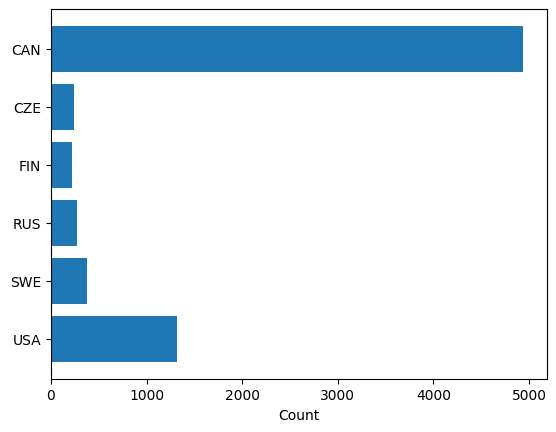

In [323]:
player_ctry = player_info.groupby('Ctry')['Ctry'].count()
fig, ax = plt.subplots()
ax.barh(player_ctry[player_ctry > 100].index, player_ctry[player_ctry > 100], align='center')
ax.set_yticks(player_ctry[player_ctry > 100].index, labels=player_ctry[player_ctry > 100].index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
plt.show()

In [324]:
print(player_info.groupby('Ctry')['Ctry'].count().sort_values(ascending=False)[:5])

Ctry
CAN    4941
USA    1316
SWE     379
RUS     276
CZE     237
Name: Ctry, dtype: int64


Из чего можно сделать вывод: больше всего игроков было взято из Канады, из США было взято в 4 раза меньше

## 2) Какое значение параметра "Points per Game Played" у игроков входящих в 5% лучших?

In [325]:
int(len(player_info) * 0.95)

7348

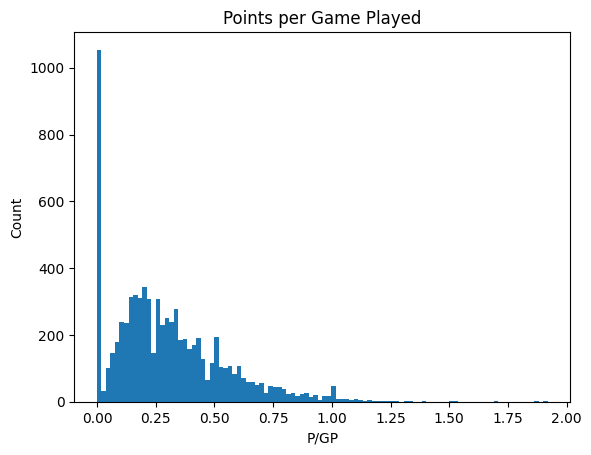

In [326]:
plt.title('Points per Game Played')
plt.xlabel('P/GP')
plt.ylabel('Count')
plt.hist(player_info['P/GP'], bins=100)
plt.show()

In [327]:
player_info.sort_values(by='P/GP')[int(len(player_info) * 0.95):].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S'])

,Player,DOB,Birth City,GP,P/GP,Changed Year
3238,Cliff Ronning,1965-10-01,Burnaby,1137,0.76,1965
1668,Gregg Sheppard,1949-04-23,North Battleford,657,0.76,1945
7269,Brandon Hagel,1998-08-27,Saskatoon,339,0.76,1995
5454,Rick Nash,1984-06-16,Brampton,1060,0.76,1980
3844,Tony Amonte,1970-08-02,Hingham,1174,0.77,1970
...,...,...,...,...,...,...
2323,Mike Bossy,1957-01-22,Montréal,752,1.50,1955
7056,Connor McDavid,1997-01-13,Richmond Hill,688,1.52,1995
19,Newsy Lalonde,1888-10-31,Cornwall,99,1.69,1885
3239,Mario Lemieux,1965-10-05,Montréal,915,1.88,1965


Ответ: 0.76

## 3) Правда ли, что средний рост игроков пропорционален среднему росту в Канаде (в зависимости от даты рождения)?

In [328]:
average_heights_USA = average_heights[average_heights['Code'] == 'USA'].drop(columns=['Code', 'Entity'])
average_heights_USA

,Year,M,F,Changed Year
19998,1896-01-01,171.079272,158.514920,1895
19999,1897-01-01,171.179657,158.570227,1895
20000,1898-01-01,171.280292,158.625834,1895
20001,1899-01-01,171.381148,158.681789,1895
20002,1900-01-01,171.482114,158.737983,1900
...,...,...,...,...
20094,1992-01-01,177.243253,163.613066,1990
20095,1993-01-01,177.214932,163.594907,1990
20096,1994-01-01,177.186675,163.575945,1990
20097,1995-01-01,177.158675,163.557090,1995


In [329]:
average_heights_SWE = average_heights[average_heights['Code'] == 'SWE'].drop(columns=['Code', 'Entity'])
average_heights_SWE

,Year,M,F,Changed Year
18079,1896-01-01,171.896352,160.288543,1895
18080,1897-01-01,172.002883,160.369466,1895
18081,1898-01-01,172.109790,160.450537,1895
18082,1899-01-01,172.216704,160.531666,1895
18083,1900-01-01,172.322996,160.612728,1900
...,...,...,...,...
18175,1992-01-01,179.810732,165.884897,1990
18176,1993-01-01,179.792180,165.838285,1990
18177,1994-01-01,179.773781,165.791463,1990
18178,1995-01-01,179.755314,165.744505,1995


In [330]:
average_heights_CAN = average_heights[average_heights['Code'] == 'CAN'].drop(columns=['Code', 'Entity'])
average_heights_CAN

,Year,M,F,Changed Year
3232,1896-01-01,170.723783,157.614450,1895
3233,1897-01-01,170.782699,157.687290,1895
3234,1898-01-01,170.841938,157.760403,1895
3235,1899-01-01,170.901283,157.833531,1895
3236,1900-01-01,170.960483,157.906711,1900
...,...,...,...,...
3328,1992-01-01,177.953429,163.763161,1990
3329,1993-01-01,177.987919,163.800606,1990
3330,1994-01-01,178.022373,163.837792,1990
3331,1995-01-01,178.056459,163.874892,1995


In [331]:
player_info_grouped_Ht = player_info[player_info['Ht'] > 0].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City']).groupby('Changed Year').mean()
player_info_grouped_Ht['Changed Year'] = player_info_grouped_Ht.index
player_info_grouped_Ht

,Ht,Changed Year
Changed Year,,
1875,180.340000,1875
1880,178.816000,1880
1885,175.006000,1885
1890,177.311538,1890
1895,176.129863,1895
1900,176.936400,1900
1905,177.572276,1905
1910,178.540132,1910
1915,178.266531,1915


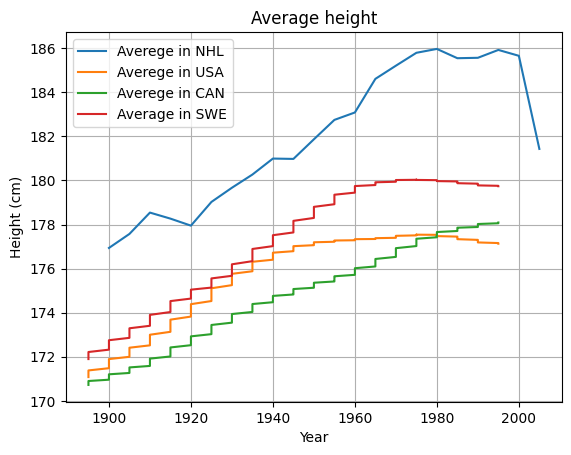

In [332]:
plt.title('Average height')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.grid()
plt.plot(player_info_grouped_Ht[player_info_grouped_Ht['Changed Year'] >= 1900]['Changed Year'],
         player_info_grouped_Ht[player_info_grouped_Ht['Changed Year'] >= 1900]['Ht'], label = 'Averege in NHL')
plt.plot(average_heights_USA['Changed Year'], average_heights_USA['M'], label = 'Averege in USA')
plt.plot(average_heights_CAN['Changed Year'], average_heights_CAN['M'], label = 'Averege in CAN')
plt.plot(average_heights_SWE['Changed Year'], average_heights_SWE['M'], label = 'Average in SWE')
plt.legend()

График Канады растёт так же, как и график НХЛ примерно до 1970ого года, но потом продолжает рост в отличие от графика НХЛ

График Швеции более похож на график НХЛ. Швеция занимает 3е место в статистике НХЛ по количеству игроков из каждой страны (см. п.1). Вполне возможно в 1960ом году увеличилось количество игроков из этой страны. Проверим это

В 1960ых НХЛ удвоила число команд, и продолжала расширяться ещё почти удвоив число команд к концу 70ых. Возможно это стало причиной.

In [333]:
player_info_grouped_Count_CAN = player_info[(player_info['Ht'] > 0) & (player_info['Ctry'] == 'CAN')].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City', 'Ht']).groupby('Changed Year').count()
player_info_grouped_Count_CAN['Changed Year'] = player_info_grouped_Count_CAN.index
player_info_grouped_Count_CAN = player_info_grouped_Count_CAN.rename(columns={'Ctry': 'Count'})
player_info_grouped_Count_CAN

,Count,Changed Year
Changed Year,,
1875,1,1875
1880,3,1880
1885,18,1885
1890,50,1890
1895,69,1895
1900,88,1900
1905,121,1905
1910,124,1910
1915,134,1915


In [334]:
player_info_grouped_Count_USA = player_info[(player_info['Ht'] > 0) & (player_info['Ctry'] == 'USA')].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City', 'Ht']).groupby('Changed Year').count()
player_info_grouped_Count_USA['Changed Year'] = player_info_grouped_Count_USA.index
player_info_grouped_Count_USA = player_info_grouped_Count_USA.rename(columns={'Ctry': 'Count'})
player_info_grouped_Count_USA

,Count,Changed Year
Changed Year,,
1885,2,1885
1890,1,1890
1895,2,1895
1900,7,1900
1905,15,1905
1910,18,1910
1915,10,1915
1920,3,1920
1925,5,1925


In [335]:
player_info_grouped_Count_SWE = player_info[(player_info['Ht'] > 0) & (player_info['Ctry'] == 'SWE')].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City', 'Ht']).groupby('Changed Year').count()
player_info_grouped_Count_SWE['Changed Year'] = player_info_grouped_Count_SWE.index
player_info_grouped_Count_SWE = player_info_grouped_Count_SWE.rename(columns={'Ctry': 'Count'})
player_info_grouped_Count_SWE

,Count,Changed Year
Changed Year,,
1905,1,1905
1940,2,1940
1945,4,1945
1950,18,1950
1955,19,1955
1960,23,1960
1965,18,1965
1970,39,1970
1975,27,1975


In [336]:
player_info_grouped_Count = player_info[player_info['Ht'] > 0].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City', 'Ht']).groupby('Changed Year').count()
player_info_grouped_Count['Changed Year'] = player_info_grouped_Count.index
player_info_grouped_Count = player_info_grouped_Count.rename(columns={'Ctry': 'Count'})
player_info_grouped_Count

,Count,Changed Year
Changed Year,,
1875,1,1875
1880,5,1880
1885,20,1885
1890,52,1890
1895,73,1895
1900,100,1900
1905,145,1905
1910,151,1910
1915,147,1915


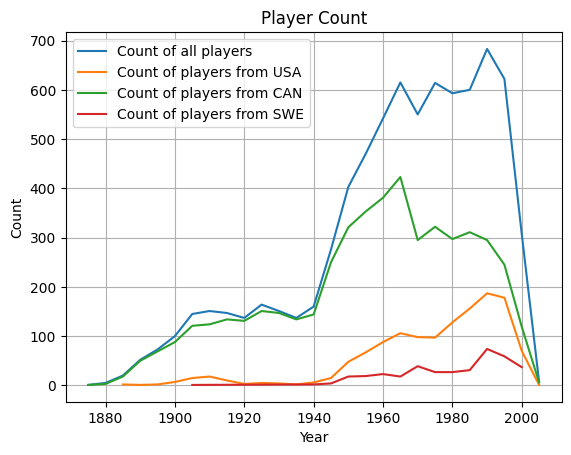

In [337]:
plt.title('Player Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.plot(player_info_grouped_Count['Changed Year'], player_info_grouped_Count['Count'], label = 'Count of all players')
plt.plot(player_info_grouped_Count_USA['Changed Year'], player_info_grouped_Count_USA['Count'], label = 'Count of players from USA')
plt.plot(player_info_grouped_Count_CAN['Changed Year'], player_info_grouped_Count_CAN['Count'], label = 'Count of players from CAN')
plt.plot(player_info_grouped_Count_SWE['Changed Year'], player_info_grouped_Count_SWE['Count'], label = 'Count of players from SWE')
plt.legend()

В 1970ом году нет никаких сильных изменений в количестве игроков из Швеции и США, но количество игроков из Канады резко снизилось. Видимо это и стало причиной несовпадения графиков

## Дополнительно: математически проверим до какого года средний рост игроков нхл был пропорционален среднему росту в Канаде

In [338]:
player_info_grouped_Ht

,Ht,Changed Year
Changed Year,,
1875,180.340000,1875
1880,178.816000,1880
1885,175.006000,1885
1890,177.311538,1890
1895,176.129863,1895
1900,176.936400,1900
1905,177.572276,1905
1910,178.540132,1910
1915,178.266531,1915


In [339]:
player_info_grouped_Ht_Var = player_info[player_info['Ht'] > 0].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S', 'GP', 'P/GP', 'Player', 'DOB', 'Birth City']).groupby('Changed Year').var().rename(columns={'Ht': 'Var'})
player_info_grouped_Ht_Var['Changed Year'] = player_info_grouped_Ht_Var.index
player_info_grouped_Ht_Var

,Var,Changed Year
Changed Year,,
1875,NaN,1875
1880,21.290280,1880
1885,29.813183,1885
1890,27.081151,1890
1895,27.279368,1895
1900,28.050775,1900
1905,27.949518,1905
1910,21.556035,1910
1915,25.719826,1915


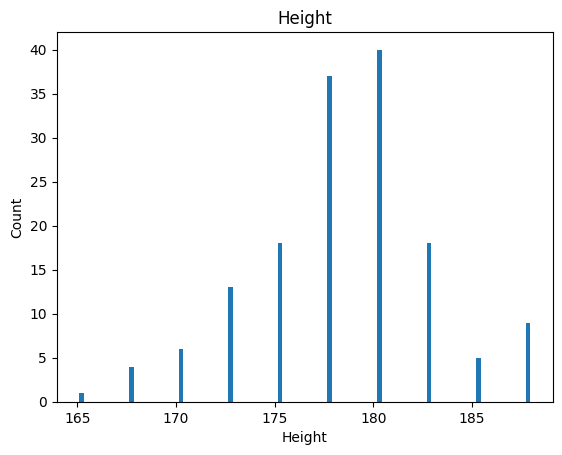

In [340]:
plt.title('Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.hist(player_info[(player_info['Changed Year'] == 1910) & (player_info['Ht'] > 0)]['Ht'], bins=100)
plt.show()

In [341]:
average_heights_CAN

,Year,M,F,Changed Year
3232,1896-01-01,170.723783,157.614450,1895
3233,1897-01-01,170.782699,157.687290,1895
3234,1898-01-01,170.841938,157.760403,1895
3235,1899-01-01,170.901283,157.833531,1895
3236,1900-01-01,170.960483,157.906711,1900
...,...,...,...,...
3328,1992-01-01,177.953429,163.763161,1990
3329,1993-01-01,177.987919,163.800606,1990
3330,1994-01-01,178.022373,163.837792,1990
3331,1995-01-01,178.056459,163.874892,1995


In [342]:
average_heights_CAN[average_heights_CAN['Changed Year'] == 1920]['M'].mean()

172.72750188

In [343]:
def get_ttest(year, coef):
    t_stat, p_value = stats.ttest_1samp(player_info[(player_info['Changed Year'] == year) & (player_info['Ht'] > 0)]['Ht'], average_heights_CAN[average_heights_CAN['Changed Year'] == year]['M'].mean() * coef)
    return p_value

In [344]:
def check_all(coef):
    l = []
    l2 = []
    for i in range(1900, 2005, 5):
        l2.append(get_ttest(i, coef))
        if (l2[-1] < 0.05):
            l.append(False)
        else:
            l.append(True)
    df = pd.DataFrame()
    df['Year'] = range(1900, 2005, 5)
    df['Res'] = l2
    df['Good'] = l
    return df

In [345]:
check_all(1.0352)

,Year,Res,Good
0,1900,7.519839e-01,True
1,1905,7.355074e-01,True
2,1910,4.902837e-02,False
3,1915,9.745206e-01,True
4,1920,5.008101e-02,True
5,1925,4.257738e-01,True
6,1930,6.411366e-01,True
7,1935,8.291978e-01,True
8,1940,5.587225e-01,True
9,1945,6.296218e-01,True


Таким образом мы видим, что начиная с 1900ого года и до 1950ого (кроме 1910) высока вероятность того, что средний рост игроков нхл пропорционален среднему росту жителей Канады с коэф. 1.0352

Итог: Во время, когда почти все игроки были из Канады, средний рост игроков НХЛ был пропорционален среднему росту граждан этой страны, после этого появились различия, которые обусловлены уменьшением процента игроков из Канады среди всех игроков НХЛ

## 4) В каком возрасте играют первый сезон?

In [346]:
player_info['1st Season Age'] = (player_info['1st Season'] - player_info['DOB']).apply(lambda x: x.days // 365)
player_info['1st Season Age']

0       37
1       35
2       34
3       33
4       42
        ..
7730    17
7731    17
7732    17
7733    17
7734    17
Name: 1st Season Age, Length: 7735, dtype: int64

In [347]:
player_info_grouped_mean = player_info.drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S']).drop(columns=['DOB', 'Player', 'Birth City', 'Changed Year']).groupby('1st Season Age').mean()
player_info_grouped_mean['1st Season Age'] = player_info_grouped_mean.index
player_info_grouped_mean

,GP,P/GP,1st Season Age
1st Season Age,,,
16,310.642857,0.340000,16
17,607.516245,0.495451,17
18,496.319588,0.411973,18
19,385.848757,0.358999,19
20,296.288095,0.292643,20
21,249.846025,0.265213,21
22,197.013416,0.250784,22
23,159.289833,0.238027,23
24,133.366292,0.221191,24


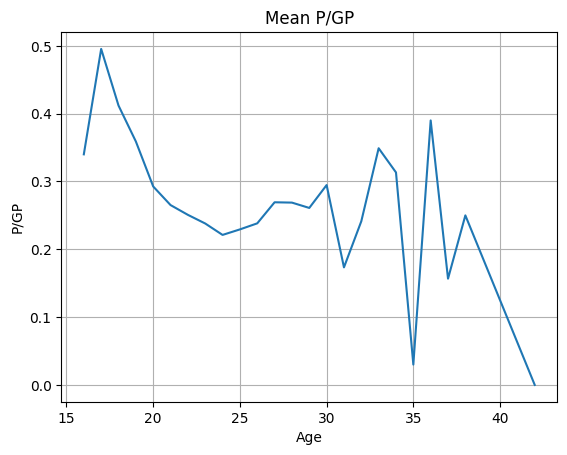

In [348]:
plt.title('Mean P/GP')
plt.xlabel('Age')
plt.ylabel('P/GP')
plt.grid()
plt.plot(player_info_grouped_mean['1st Season Age'], player_info_grouped_mean['P/GP'])

In [349]:
player_info_grouped_var = player_info.drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S']).drop(columns=['DOB', 'Player', 'Birth City', 'Changed Year']).groupby('1st Season Age').var()
player_info_grouped_var['1st Season Age'] = player_info_grouped_var.index
player_info_grouped_var

,GP,P/GP,1st Season Age
1st Season Age,,,
16,103485.631868,0.077523,16
17,219214.721655,0.090686,17
18,173133.583554,0.071991,18
19,138274.845804,0.061192,19
20,106184.734251,0.049622,20
21,90960.517310,0.046057,21
22,64410.244655,0.044777,22
23,50389.756295,0.042868,23
24,31180.097510,0.036591,24


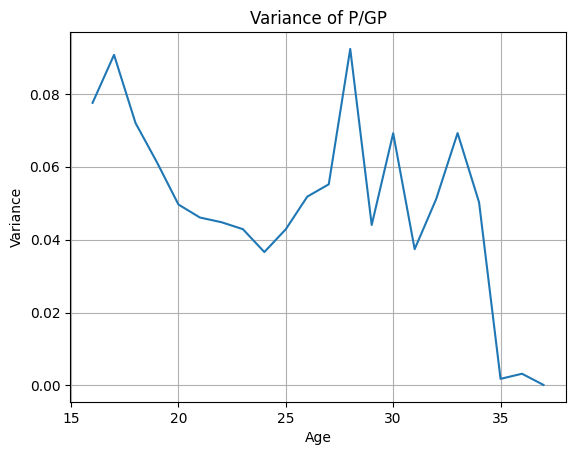

In [350]:
plt.title('Variance of P/GP')
plt.xlabel('Age')
plt.ylabel('Variance')
plt.grid()
plt.plot(player_info_grouped_var['1st Season Age'], player_info_grouped_var['P/GP'])

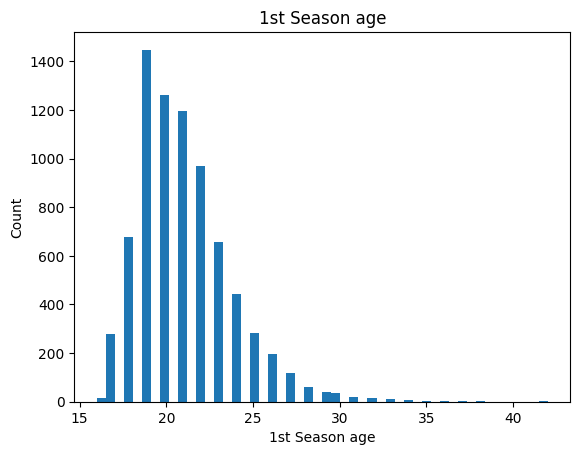

In [351]:
plt.title('1st Season age')
plt.xlabel('1st Season age')
plt.ylabel('Count')
plt.hist(player_info['1st Season Age'], bins=50)
plt.show()

In [352]:
player_info

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,...,P,PIM,P/GP,SHG,SHP,OTG,GWG,S,Changed Year,1st Season Age
0,Jack Laviolette,R,D,1879-07-27,Belleville,ON,CAN,CAN,180.34,170,...,3,6,0.17,--,--,0,0,--,1875,37
1,Ken Thompson,L,L,1881-05-29,Oakengates,--,GBR,GBR,177.80,160,...,0,0,0.00,--,--,0,0,--,1880,35
2,Joe Hall,R,D,1882-05-03,Staffordshire,--,GBR,GBR,177.80,175,...,24,230,0.65,--,--,0,1,--,1880,34
3,Didier Pitre,R,R,1883-09-01,Valleyfield,QC,CAN,CAN,180.34,185,...,99,87,0.78,--,--,0,12,--,1880,33
4,Lester Patrick,L,D,1883-12-30,Drummondville,QC,CAN,CAN,185.42,180,...,0,2,0.00,--,--,0,0,--,1880,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,Bradly Nadeau,R,L,2005-05-05,St-Francois de Madaw,NB,CAN,CAN,180.34,172,...,0,0,0.00,0,0,0,0,3,2005,17
7731,Zach Benson,L,L,2005-05-12,Chilliwack,BC,CAN,CAN,177.80,170,...,46,70,0.41,0,0,0,1,159,2005,17
7732,Connor Bedard,R,C,2005-07-17,North Vancouver,BC,CAN,CAN,177.80,185,...,102,50,0.89,0,0,1,5,318,2005,17
7733,Macklin Celebrini,L,C,2006-06-13,North Vancouver,BC,CAN,CAN,182.88,190,...,34,14,0.89,0,0,1,3,125,2005,17


In [353]:
player_info['1st Season Age'].describe()

count    7735.000000
mean       21.104072
std         2.686759
min        16.000000
25%        19.000000
50%        21.000000
75%        22.000000
max        42.000000
Name: 1st Season Age, dtype: float64

Итог: средний возраст для первого сезона в НХЛ

## 5) Как изменились средние показатели после 60-ого года?

In [354]:
player_info17.describe()

,GP,G,A,P,P/GP
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,158.061576,31.555008,39.720033,71.275041,0.294401
std,197.138124,55.664646,67.650544,120.047919,0.254805
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,1.000000,0.090000
50%,63.500000,6.000000,8.000000,15.000000,0.250000
75%,247.000000,32.750000,47.000000,86.000000,0.450000
max,999.000000,544.000000,531.000000,977.000000,1.690000


In [355]:
player_info60.describe()

,GP,G,A,P,P/GP
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000
mean,299.424801,52.229420,87.223122,139.452542,0.301898
std,346.198628,94.461117,145.422934,234.311191,0.237654
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,4.000000,0.140000
50%,141.000000,11.000000,22.000000,34.000000,0.250000
75%,513.000000,57.000000,111.000000,172.000000,0.430000
max,1779.000000,894.000000,1963.000000,2857.000000,1.920000


In [356]:
player_info17[player_info17['GP'] >= 50].describe()

,GP,G,A,P,P/GP
count,665.000000,665.000000,665.000000,665.000000,665.000000
mean,276.745865,56.627068,71.242105,127.869173,0.396917
std,199.975511,65.471592,78.668743,139.015502,0.229216
min,50.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,11.000000,15.000000,29.000000,0.210000
50%,220.000000,28.000000,39.000000,71.000000,0.370000
75%,419.000000,84.000000,106.000000,197.000000,0.540000
max,999.000000,544.000000,531.000000,977.000000,1.690000


In [357]:
player_info60[player_info60['GP'] >= 50].describe()

,GP,G,A,P,P/GP
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,448.686485,79.107249,132.056254,211.163503,0.379687
std,343.462820,107.276974,162.513113,262.269328,0.226707
min,50.000000,0.000000,1.000000,1.000000,0.010000
25%,149.000000,11.000000,23.000000,36.000000,0.210000
50%,359.000000,35.000000,69.000000,109.000000,0.330000
75%,684.000000,102.000000,185.000000,288.000000,0.510000
max,1779.000000,894.000000,1963.000000,2857.000000,1.920000
